In [2]:
%cd /content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai2

/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai2


# Bài tập 2 - Pha trộn hình ảnh (Image blending)

Các bạn thực hiện các thao tác pha trộn ảnh dựa trên hướng dẫn sau:

http://luyencong.ml/en/thi-giac-may-tinh/cac-thao-tac-co-ban/pha-tron-anh/

và alpha blending https://note.nkmk.me/en/python-opencv-numpy-alpha-blend-mask/


Sau đó làm ra các hiệu ứng tượng tự như sau:
* Đối với những pixel ngoài cơ thể người (background): Hiệu ứng đè lên 100%.
* Đối với những pixel trong cơ thể người (foreground): từ dưới lên thì hiệu ứng mờ dần.


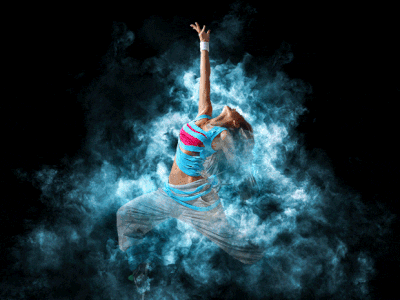

**Testcase mẫu:**

Input: 

Effect:


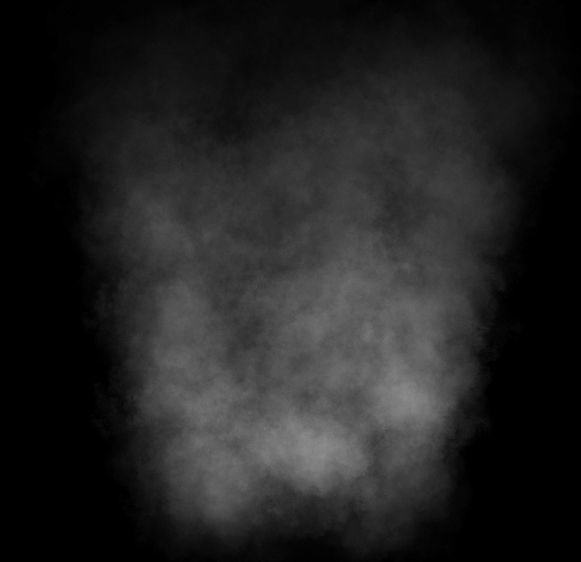


Ảnh chính: 

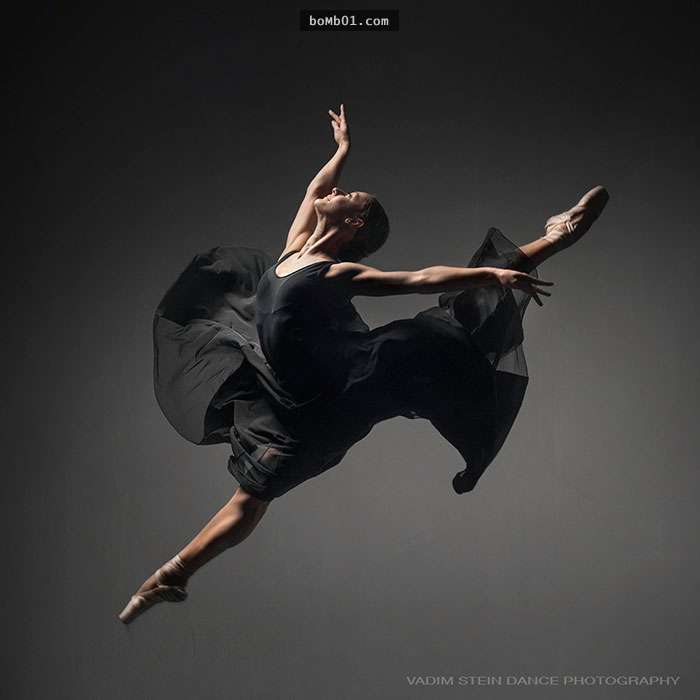

Output: 

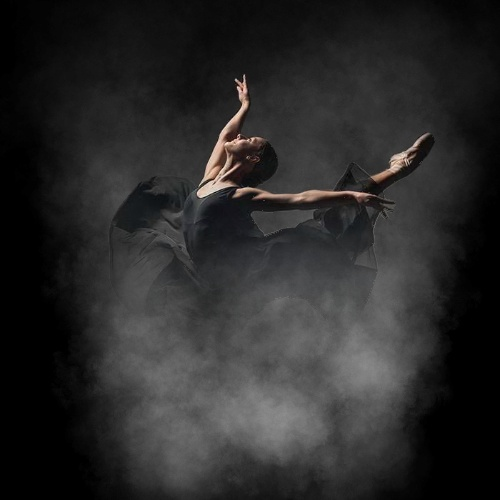

In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def sol(mask_img, foreground_image, effect_image): 
    # 1. Đọc ảnh mask
    mask = cv2.imread(mask_img, cv2.IMREAD_UNCHANGED)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    # 2. Đọc ảnh foreground
    foreground = cv2.imread(foreground_image)
    foreground = cv2.resize(foreground, (mask.shape[0], mask.shape[1]))

    # 3. Doc anh hieu ung
    frame = cv2.imread(effect_image)

    foreground_height, foreground_width, _ = foreground.shape
    effect_height, effect_width, _ = frame.shape

    top = abs(foreground_height - effect_height)//2
    left = abs(foreground_width - effect_width)//2

    frame = frame[top:effect_height - top, left:effect_width-left, :]

    # 4. Blending image
    # 4.1. Chon ham sigmoid de chuan hoa alpha
    def sigmoid(x):
        y = 1 / (1 + math.exp(9-18*x))
        y = round(y, 2)
        return y

    # 4.2. Blending image
    result = foreground.copy()
    alpha_channel = mask[:, :, -1]
    # duyet qua pixel cua mask
    for index1, row in enumerate(alpha_channel): 
        percent = sigmoid(1- index1/alpha_channel.shape[0])
        for index2, column in enumerate(row): 
            # ap toan bo hieu ung
            if column != 0: 
                ### BEGIN SOLUTION
                result[index1, index2]  = result[index1, index2] * percent + (1- percent) * frame[index1, index2]
                ### END SOLUTION
            else: 
                ### BEGIN SOLUTION
                result[index1, index2]  = frame[index1, index2]
                ### END SOLUTION

    return result

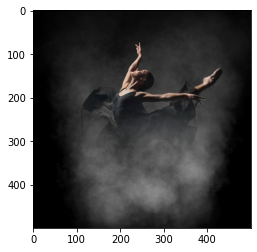

In [5]:
# thử nghiệm với ví dụ của đề bài
result = sol(mask_img='people-mask_testcase0.png', 
            foreground_image='people_testcase0.jpg', 
            effect_image='effect_testcase0.png')

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# cham diem voi public test
def evaluate(img1, img2):
  img1 = img1.astype(np.int16)
  img2 = img2.astype(np.int16)
  return np.mean(np.abs(img1 - img2))/255. < 0.01
  
testcase = cv2.imread('result_testcase0.jpg')
assert evaluate(result, testcase)

In [11]:
### BEGIN HIDDEN TESTS
def sol_for_test(mask_img, foreground_image, effect_image): 
    # 1. Đọc ảnh mask
    mask = cv2.imread(mask_img, cv2.IMREAD_UNCHANGED)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    # 2. Đọc ảnh foreground
    foreground = cv2.imread(foreground_image)
    foreground = cv2.resize(foreground, (mask.shape[0], mask.shape[1]))

    # 3. Doc hieu ung
    frame = cv2.imread(effect_image)

    foreground_height, foreground_width, _ = foreground.shape
    effect_height, effect_width, _ = frame.shape

    top = abs(foreground_height - effect_height)//2
    left = abs(foreground_width - effect_width)//2

    frame = frame[top:effect_height - top, left:effect_width-left, :]

    # 4. Blending image
    # 4.1. Chon ham sigmoid de chuan hoa alpha
    def sigmoid(x):
        y = 1 / (1 + math.exp(9-18*x))
        y = round(y, 2)
        return y

    # 4.2. Blending image
    result = foreground.copy()
    alpha_channel = mask[:, :, -1]
    # duyet qua pixel cua mask
    for index1, row in enumerate(alpha_channel): 
        alpha_object = sigmoid(1- index1/alpha_channel.shape[0])
        for index2, column in enumerate(row): 
            if column != 0: 
                result[index1, index2]  = result[index1, index2] * alpha_object + (1- alpha_object) * frame[index1, index2]
            else: 
                result[index1, index2]  = frame[index1, index2]

    return result

assert np.all(sol(mask_img='people-mask_testcase0.png', 
                  foreground_image='people_testcase0.jpg', 
                  effect_image='effect_testcase0.png') == sol_for_test(mask_img='people-mask_testcase0.png', 
                                                                      foreground_image='people_testcase0.jpg', 
                                                                      effect_image='effect_testcase0.png'))
### END HIDDEN TESTS